# Regresja

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
import warnings
from typing import Literal

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics, model_selection
from sklearn.linear_model import ElasticNet, Lasso, LinearRegression, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import PolynomialFeatures


Rozważmy zbiór Boston

In [20]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [21]:
# get the data
boston_X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
boston_Y = boston.values[1::2, 2]

In [22]:
X=boston_X
y=boston_Y

# Zadanie
Znajdż najleprzy model za pomocą podwujną cross-validation (nested cross-validation, double cross-validation) .


In [23]:
seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
kfold1 = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

In [33]:
reg_models = {
    'lr': LinearRegression(),
    'elasticnet': ElasticNet(),
    'lasso': Lasso(),
    'ridge': Ridge()
}

def best_fit(reg_model: Literal['elasticnet', 'lasso', 'ridge', 'lr']) -> Pipeline:
    param_grid = {
        'polynomialfeatures__degree': [1, 2, 3, 4],
    }
    if reg_model != 'lr':
        param_grid[f'{reg_model}__alpha'] = [0.01, 0.1, 1, 10]

    grid = GridSearchCV(
        make_pipeline(PolynomialFeatures(), reg_models[reg_model]),
        param_grid=param_grid,
        cv=kfold,
        scoring="r2"
    )
    
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        grid.fit(X, y)
        scores = cross_val_score(grid, X, y, scoring='r2', cv=kfold1)
        
    return grid.best_estimator_, scores.mean(), scores.std()

In [36]:
df = pd.DataFrame(columns=['model', 'mean r2', 'std r2'])

for i, model in enumerate(reg_models.keys()):
    best_model, mean, std = best_fit(model)
    df.loc[i] = [model, mean, std]
    
df

,model,mean r2,std r2
0,lr,0.786308,0.069779
1,elasticnet,0.821002,0.046942
2,lasso,0.753928,0.137880
3,ridge,0.829929,0.064057


# Zad
Zwizualizuj wyniki.

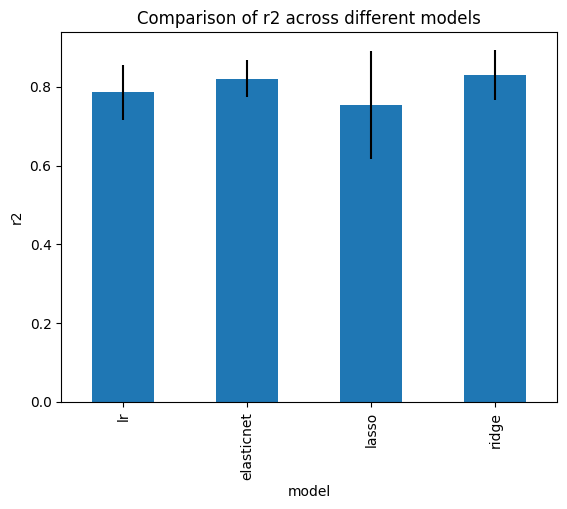

In [38]:
df.plot(x='model', y='mean r2', yerr='std r2', kind='bar', legend=False)
plt.ylabel('r2')
plt.title('Comparison of r2 across different models')
plt.show()
